In [6]:
import pandas as pd
import numpy as np

import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [4]:
conn = sqlite3.connect("..\db.sqlite3")

sql_query = '''
SELECT *
FROM restaurant_product
JOIN restaurant_orderitem ON restaurant_product.id = restaurant_orderitem.product_id
JOIN restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id;
'''

data = pd.read_sql_query(sql_query, conn)

conn.close()

data.to_csv("data.csv", index=False)

df = pd.read_csv("data.csv")
df.shape

(74818, 9)

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

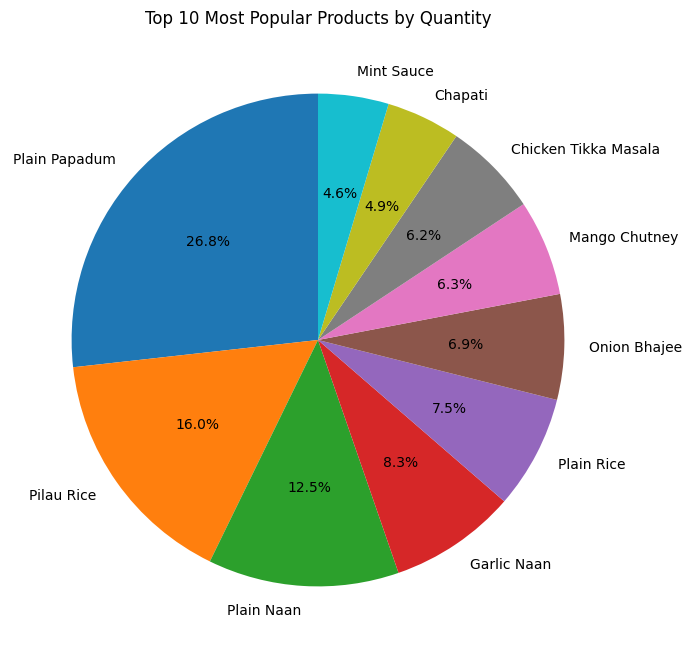

In [13]:
top_10_products = df.groupby("name").sum().sort_values(by="quantity", ascending=False).head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_products["quantity"], labels=top_10_products.index, autopct="%1.1f%%", startangle=90)
plt.title("Top 10 Most Popular Products by Quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

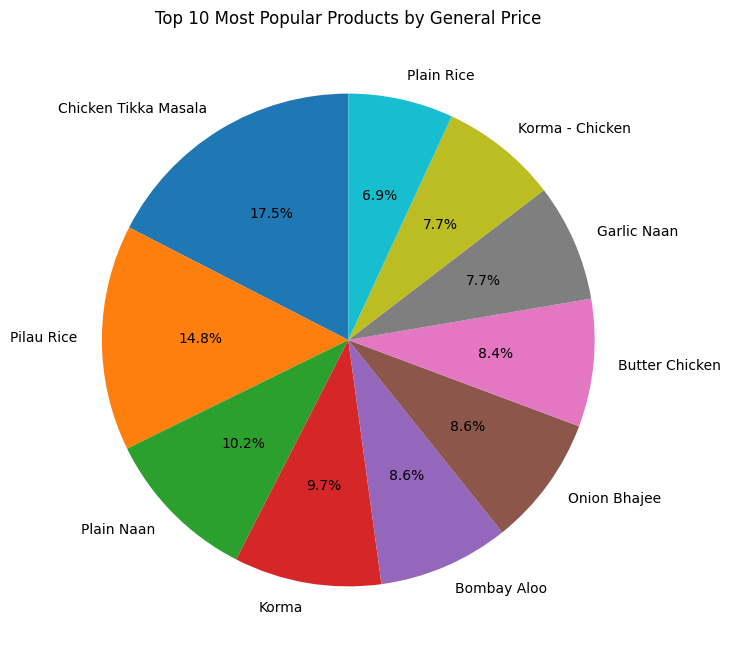

In [18]:
df["item_price"] = df["price"] * df["quantity"]

top_products_by_general_price = df.groupby("name")["item_price"].sum().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(top_products_by_general_price, labels=top_products_by_general_price.index, autopct="%1.1f%%", startangle=90)
plt.title("Top 10 Most Popular Products by General Price")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific hour the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

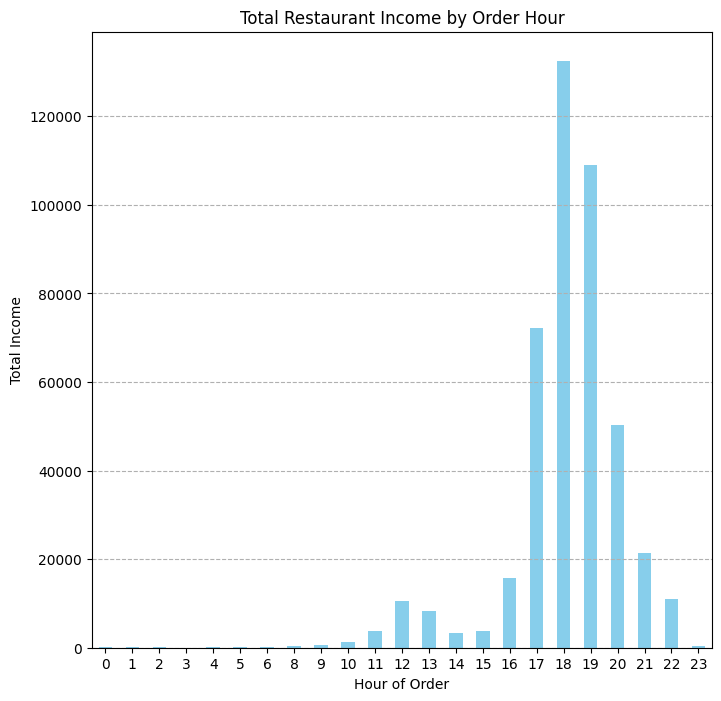

In [32]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_hour"] = df["datetime"].dt.hour
order_income_by_hour = df.groupby("order_hour")["item_price"].sum()

plt.figure(figsize=(8, 8))
order_income_by_hour.plot(kind="bar", color="skyblue")
plt.title('Total Restaurant Income by Order Hour')
plt.xlabel('Hour of Order')
plt.ylabel('Total Income')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

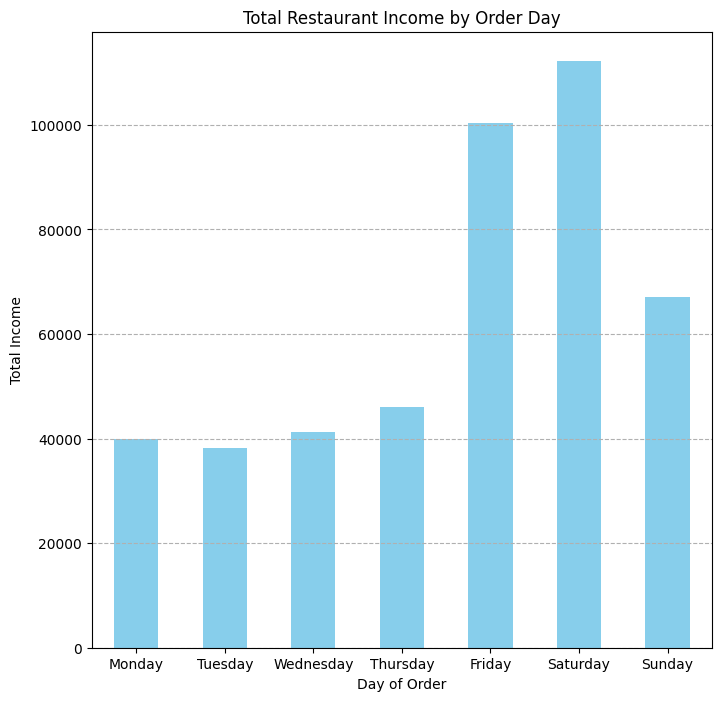

In [57]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df["order_day_of_week"] = df["datetime"].dt.day_name()

order_income_by_day = df.groupby("order_day_of_week")["item_price"].sum().reindex(days_of_week)

plt.figure(figsize=(8, 8))
order_income_by_day.plot(kind="bar", color="skyblue")
plt.title('Total Restaurant Income by Order Day')
plt.xlabel('Day of Order')
plt.ylabel('Total Income')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()